In [1]:
import sys
sys.path.append('../gefera')
import gefera as gf
import animate

In [2]:
t = np.linspace(67.8, 68.8, 1000)
#t2 = t1 + 365
#t = np.hstack((t1, t2))

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -2.0
em = 0.1
pm = 3
om = 20 * np.pi / 180
wm = 90 * np.pi / 180
im = 88.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.2
rm = 0.1

po = gf.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.HierarchicalSystem(po, mo)
lc = sys.lightcurve(t, u1, u2, rp, rm)

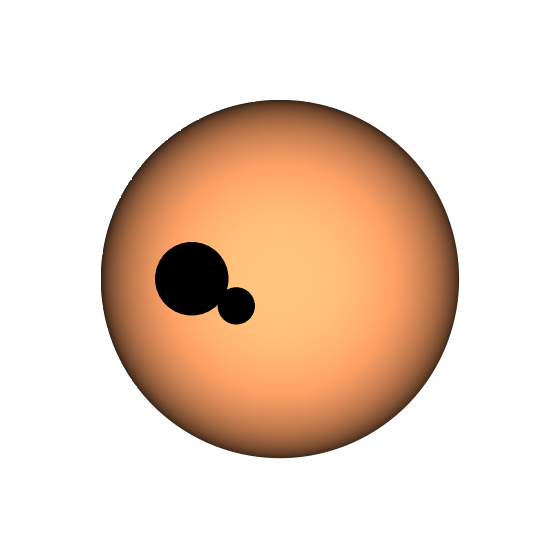

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
animate.draw(sys, ax, t[600], rp, rm, ld_params=(0.5, 0.1))

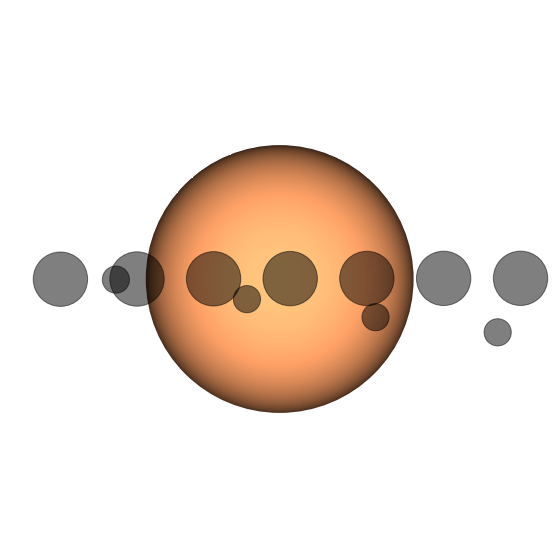

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
animate.draw_series(sys, ax, t[::150], rp, rm, ld_params=(0.5, 0.1), fill=True, alpha=0.5)

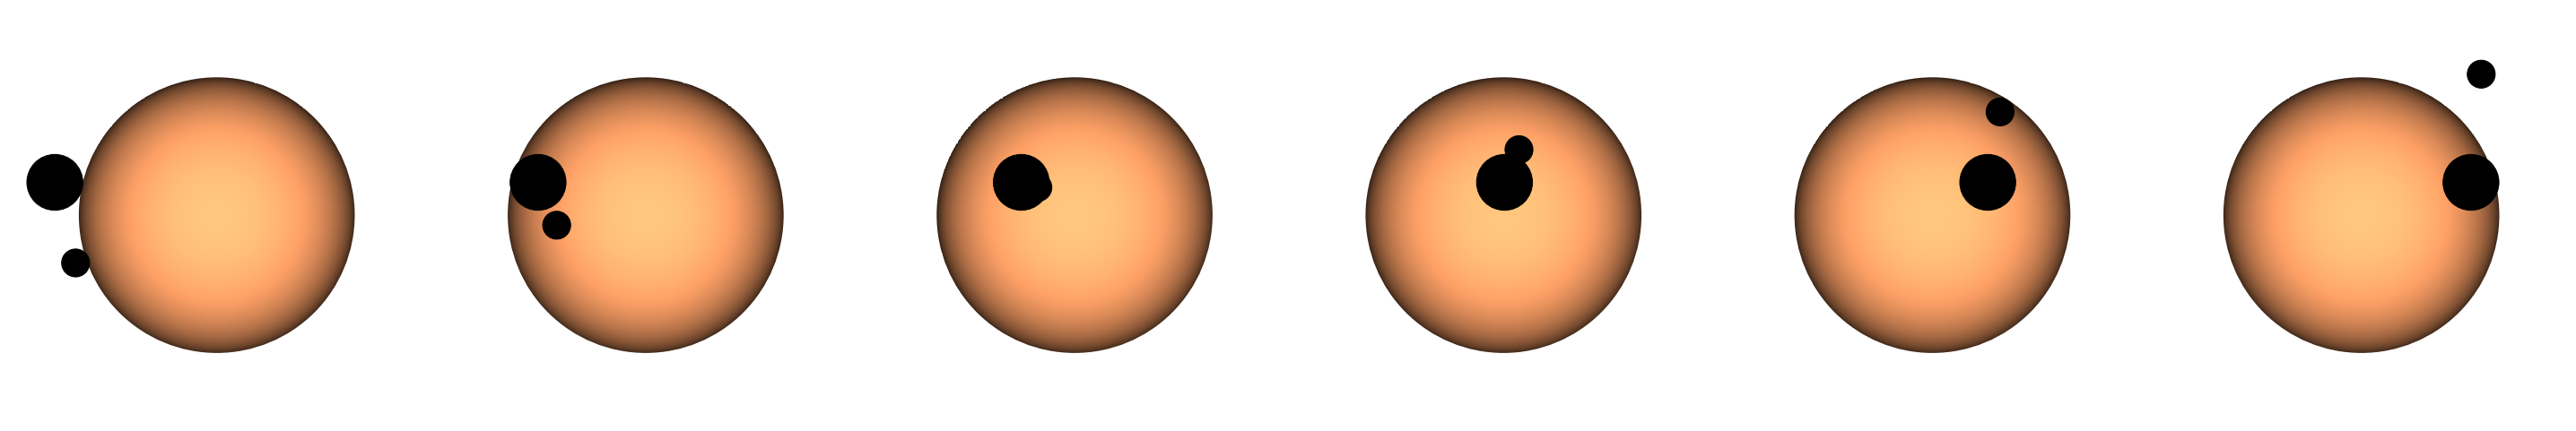

In [11]:
_, r1, r2, u1, u2, a1, t1, e1, p1, w1, i1, a2, t2, e2, p2, om2, w2, i2 = [-6.41969993e+00,  1.03655851e-01,  6.70246898e-02,  5.36459100e-01,
        6.10209971e-02,  6.19166934e-01,  1.98670323e+01,  2.43258106e-03,
        1.30142206e+02,  1.70058120e+00,  1.56903631e+00,  2.53046397e-01,
        1.51748871e+01,  1.78703812e-02,  4.51333682e+01,  2.51514633e+00,
        2.58580417e-01,  1.56503179e+00]

t = np.linspace(1513.5, 1514.1, 100)

o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)

fig, axs = plt.subplots(1, len(t[::10][2:-2]), figsize=(40, 9))
animate.snapshots(sys, axs, t[::10][2:-2], rp, rm, ld_params=(u1, u2), fill=True)
plt.subplots_adjust(wspace=0.0)
plt.tight_layout()
plt.savefig('/Users/tgordon/Desktop/kep51_snaps.pdf')

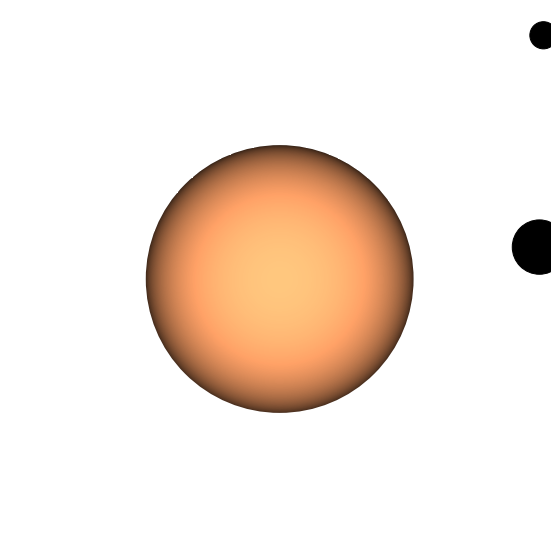

In [16]:
from IPython.display import HTML
fig = plt.figure(figsize=(10, 10))
ani = animate.animate(sys, fig, t, rp, rm, ld_params=(0.5, 0.1))
HTML(ani.to_html5_video())

In [18]:
ani.save('/Users/tgordon/Desktop/kepler51_ani.gif', writer=animation.ImageMagickWriter(fps=20))